In [1]:
from collections import defaultdict, Counter
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, classification_report
import xgboost as xgb

from scipy.stats import pearsonr, linregress
import pickle
import numpy as np
import key_functions
import math


from nltk import sent_tokenize
from nltk.corpus import stopwords
from itertools import chain

### XGBoost Comparison

In [2]:
X, y, vectorizer = key_functions.train_classifier('../../data/annotations/all_annotations_CN.txt',_, fit_model=False )


Didnt find any tags in Mawani v. Pitcairn, [2012] B.C.J. No. 1819
Didnt find any tags in Aiken (Guardian ad litem of) v. Van Dyk, [2001] B.C.J. No. 1751
Didnt find any tags in Millard v. Singleton, [2015] B.C.J. No. 1234 %
Didnt find any tags in Cowie v. Draper, [2010] B.C.J. No. 910935154 %
Didnt find any tags in Bajwa v. Deol, [2018] I.L.R. para. G-2792606 %
Didnt find any tags in Jackson v. Fisheries and Oceans Canada, [2006] B.C.J. No. 2654
Didnt find any tags in Los Angeles Salad Co. v. Canadian Food Inspection Agency, [2009] B.C.J. No. 161
Didnt find any tags in Brooks-Martin v. Martin, [2011] B.C.J. No. 243
Didnt find any tags in Gibson v. Matthies, [2017] B.C.J. No. 96556 %
Didnt find any tags in Gray v. Ellis, [2007] I.L.R. para. M-211801 %
Didnt find any tags in Morrow v. Outerbridge, 2009 CHFL para. 15,554
Didnt find any tags in Rackstraw (Litigation guardian of) v. Robertson, [2011] B.C.J. No. 1354
Didnt find any tags in Ahlwat v. Green, [2014] B.C.J. No. 245267576 %
Didnt 

In [3]:
clf = xgb.XGBClassifier()
y_pred = cross_val_predict(clf, X, y)
print(classification_report(y, y_pred))

/home/ilana/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


                      precision    recall  f1-score   support

          aggravated       0.70      0.67      0.68        21
         future care       0.77      0.71      0.74       243
    future wage loss       0.65      0.62      0.63       238
             general       0.70      0.55      0.62        87
            in trust       0.64      0.42      0.51        38
       non pecuniary       0.80      0.81      0.80       344
               other       0.83      0.96      0.89      2987
      past wage loss       0.66      0.58      0.62       232
            punitive       0.79      0.79      0.79        39
        reduction by       0.89      0.50      0.64        16
        reduction to       0.67      0.08      0.14        26
             special       0.71      0.78      0.74       257
     sub-future care       0.10      0.01      0.02        78
sub-future wage loss       0.00      0.00      0.00        37
         sub-general       0.00      0.00      0.00        22
       

/home/ilana/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Evaluate Using Classifiers

In [2]:
model, vectorizer, annotated_damages = key_functions.train_classifier('../../data/annotations/all_annotations_CN.txt', LogisticRegression(C = 1, penalty='l2', solver = 'newton-cg', max_iter = 1000, random_state=42) )

Didnt find any tags in Mawani v. Pitcairn, [2012] B.C.J. No. 1819
Didnt find any tags in Aiken (Guardian ad litem of) v. Van Dyk, [2001] B.C.J. No. 1751
Didnt find any tags in Millard v. Singleton, [2015] B.C.J. No. 1234 %
Didnt find any tags in Cowie v. Draper, [2010] B.C.J. No. 910935154 %
Didnt find any tags in Bajwa v. Deol, [2018] I.L.R. para. G-2792606 %
Didnt find any tags in Jackson v. Fisheries and Oceans Canada, [2006] B.C.J. No. 2654
Didnt find any tags in Los Angeles Salad Co. v. Canadian Food Inspection Agency, [2009] B.C.J. No. 161
Didnt find any tags in Brooks-Martin v. Martin, [2011] B.C.J. No. 243
Didnt find any tags in Gibson v. Matthies, [2017] B.C.J. No. 96556 %
Didnt find any tags in Gray v. Ellis, [2007] I.L.R. para. M-211801 %
Didnt find any tags in Morrow v. Outerbridge, 2009 CHFL para. 15,554
Didnt find any tags in Rackstraw (Litigation guardian of) v. Robertson, [2011] B.C.J. No. 1354
Didnt find any tags in Ahlwat v. Green, [2014] B.C.J. No. 245267576 %
Didnt 

/home/ilana/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/home/ilana/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/ilana/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/home/ilana/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/ilana/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/home/ilana/anaconda3/lib/pytho

Cross validation evaluation...
                      precision    recall  f1-score   support

          aggravated       0.64      0.33      0.44        21
         future care       0.76      0.68      0.72       243
    future wage loss       0.65      0.68      0.67       238
             general       0.62      0.51      0.56        87
            in trust       0.45      0.13      0.20        38
       non pecuniary       0.76      0.81      0.78       344
               other       0.84      0.95      0.89      2987
      past wage loss       0.69      0.69      0.69       232
            punitive       0.83      0.64      0.72        39
        reduction by       0.86      0.38      0.52        16
        reduction to       0.67      0.15      0.25        26
             special       0.66      0.77      0.71       257
     sub-future care       0.29      0.03      0.05        78
sub-future wage loss       0.17      0.03      0.05        37
         sub-general       0.00      0

/home/ilana/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ilana/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/ilana/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/ilana/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [19]:
filename = './best_model_ALL_jun_11.pkl'
pickle.dump(model, open(filename, 'wb'))

In [20]:
filename = './best_vectorizer_ALL_jun_11.pkl'
pickle.dump(vectorizer, open(filename, 'wb'))

In [17]:
filename = './annotated_damages_high_precision'
pickle.dump(annotated_damages, open(filename, 'wb'))

In [4]:
damages_model = pickle.load(open('./best_model_ALL.pkl', 'rb'))
damages_vectorizer = pickle.load(open('./best_vectorizer_ALL.pkl', 'rb'))
damages_dict = pickle.load(open('./annotated_damages_dict', 'rb'))

In [4]:
def return_feature_heatmap(n, model, vectorizer, features_subset = None):
    features_dict = defaultdict(dict)
    indices = []
    for i, category in enumerate(model.classes_):
        if features_subset:
            if category not in features_subset:
                continue
        feature_weights = model.coef_[i]
        features_dict[category]['feature'] = []
        features_dict[category]['weight'] = []
        idx = (-feature_weights).argsort()[:n]
        indices.extend(idx)
    for idx in indices:
        for i, category in enumerate(model.classes_):
            if features_subset:
                if category not in features_subset:
                    continue
            if 'feature' not in features_dict[category] or 'weight' not in features_dict[category]:
                continue
            features_dict[category]['feature'].append(vectorizer.feature_names_[idx])
            features_dict[category]['weight'].append(model.coef_[i][idx])
    features =[ features_dict[cat]['feature'] for cat in features_dict]
    features = list(chain.from_iterable(features))
    categories = [[cat]*len(features_dict[cat]['feature']) for cat in features_dict]
    categories = list(chain.from_iterable(categories))
    weight =[features_dict[cat]['weight'] for cat in features_dict]
    weight = list(chain.from_iterable(weight))

    features_df = pd.DataFrame({'Category': categories, 'Features': features, 'Weights': weight})
    heat_map = alt.Chart(features_df).mark_rect().encode(
    alt.X('Features:N', bin=False, sort=None),
    alt.Y("Category:N", sort=alt.EncodingSortField(field='Category', order='ascending')),
    color='Weights:Q')
    
    return heat_map

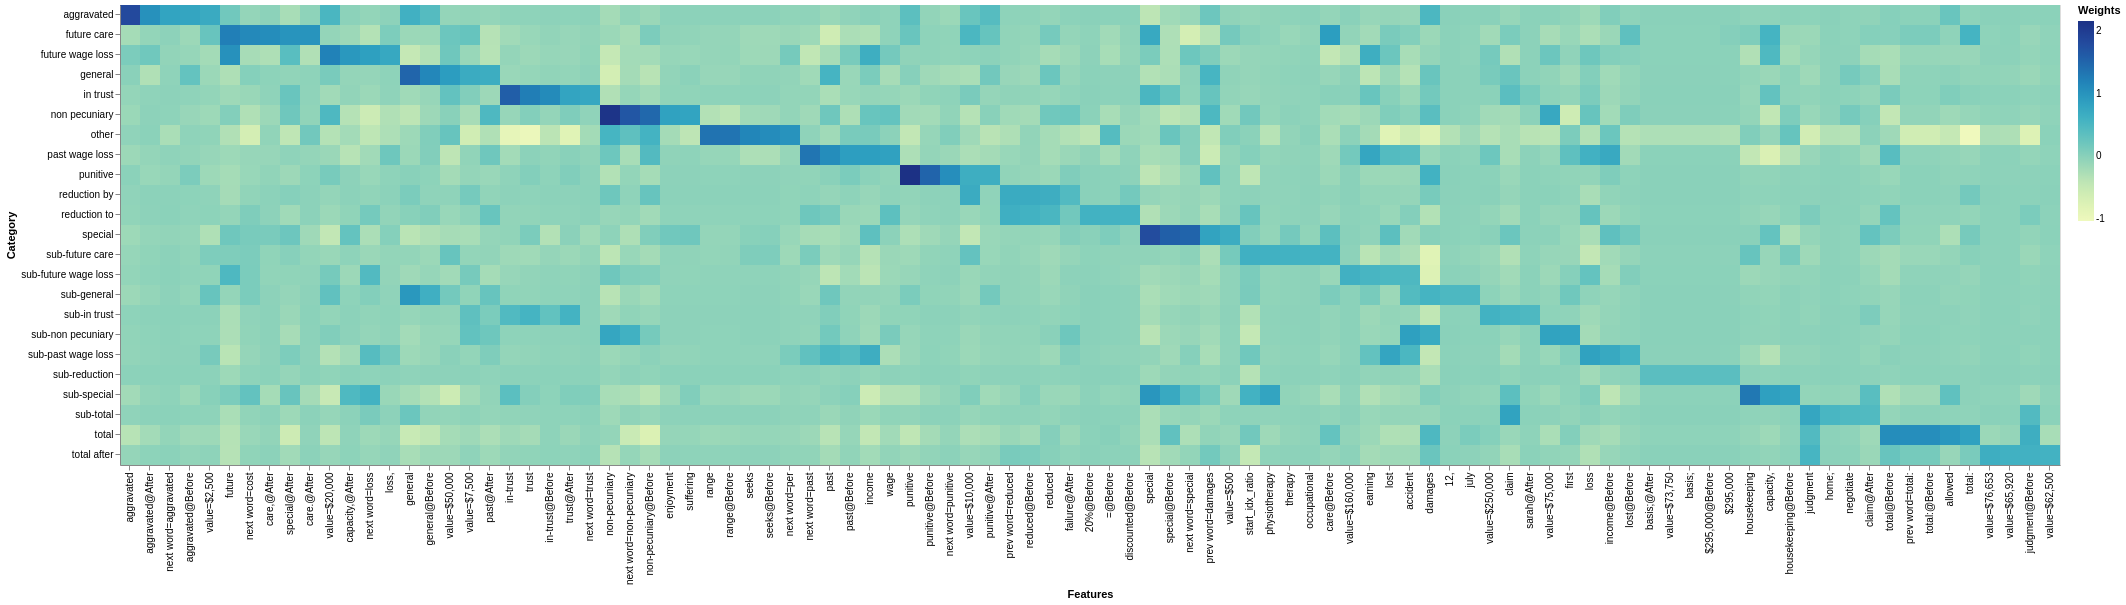

In [4]:
return_feature_heatmap(5, damages_model, damages_vectorizer)

In [5]:
model_cn, vectorizer_cn, annotated_cn = key_functions.train_CN_classifier('../../data/annotations/all_annotations_CN.txt', LogisticRegression(C = 1, penalty='l1', solver = 'liblinear', class_weight = 'balanced', max_iter = 10000, random_state=42))

Didnt find any tags in Dr. Andrew Hokhold Inc. v. Wells (c.o.b. Spall Machine & Welding), [2005] B.C.J. No. 255
Didnt find any tags in Cowie v. Draper, [2010] B.C.J. No. 910935154 %
Didnt find any tags in Bajwa v. Deol, [2018] I.L.R. para. G-2792606 %
Didnt find any tags in Jackson v. Fisheries and Oceans Canada, [2006] B.C.J. No. 2654
Didnt find any tags in Kappell v. Brown, [2012] B.C.J. No. 13964507 %
Didnt find any tags in Austin v. Joaquin, [2007] B.C.J. No. 18944 %%
Didnt find any tags in Los Angeles Salad Co. v. Canadian Food Inspection Agency, [2009] B.C.J. No. 161
Didnt find any tags in Fichtner v. Johnston Meier Insurance Services Ltd., [2001] B.C.J. No. 1666
Didnt find any tags in Mclaren v. Rice, [2009] B.C.J. No. 21089966 %%
Didnt find any tags in Gray v. Ellis, [2007] I.L.R. para. M-211801 %
Didnt find any tags in Morrow v. Outerbridge, 2009 CHFL para. 15,554
Didnt find any tags in Paniccia v. Eckert, [2012] B.C.J. No. 19976 %
Didnt find any tags in Johal v. Conron, [2013

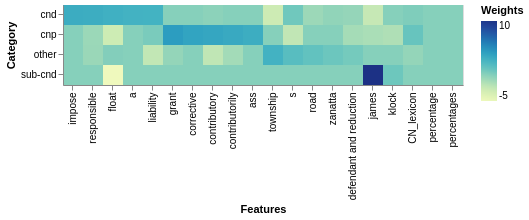

In [6]:
return_feature_heatmap(5, model_cn, vectorizer_cn)

In [6]:
path = "../../data/Lexis Cases txt/"
list_of_files = os.listdir(path)

# list of dictionaries of attributes per document
all_cases_parsed =[]
for file in list_of_files:
    if file != ".DS_Store" and file != ".ipynb_checkpoints":
        print(file)
        all_cases_parsed.extend(key_functions.rule_based_parse_BCJ(path + file,
                                                                   damages_model, damages_vectorizer, damages_dict,  
                                                                   cn_model = model_cn, cn_vectorizer = vectorizer_cn, 
                                                                   annotated_cn=annotated_cn))

P1.txt
P21.txt
P64.txt
P14.txt
P41.txt
P11.txt
P60.txt
P48.txt
P83.txt
P23.txt
P73.txt
P26.txt
P75.txt
P65.txt
P32.txt
P34.txt
P16.txt
P37.txt
P7.txt
P51.txt
P30.txt
P25.txt
P62.txt
P19.txt
P53.txt
P49.txt
P39.txt
P45.txt
P72.txt
P55.txt
P81.txt
P22.txt
P28.txt
ERROR: cant convert string, 0%
P58.txt
P46.txt
P3.txt
P5.txt
P8.txt
P56.txt
P43.txt
P36.txt
P2.txt
P13.txt
P67.txt
P38.txt
P79.txt
P57.txt
P80.txt
P84.txt
P54.txt
P50.txt
P77.txt
P20.txt
P24.txt
P85.txt
P10.txt
P6.txt
P35.txt
P74.txt
P27.txt
P78.txt
P61.txt
P71.txt
P9.txt
P70.txt
P44.txt
P15.txt
P82.txt
P69.txt
P29.txt
P18.txt
P4.txt
P40.txt
P66.txt
P12.txt
P59.txt
P63.txt
P68.txt
P33.txt
P47.txt
P76.txt
P52.txt
P31.txt
P17.txt
P42.txt


In [7]:
df_all_cases = key_functions.rule_based_convert_cases_to_DF(all_cases_parsed)
df_all_cases['Contributory Negligence Successful'].replace(np.nan, False, inplace = True)
df_all_cases[:10]

,Case Number,Case Name,Year,Total Damage,Total Pecuniary,Non Pecuniary,General,Special,Punitive,Aggravated,Future Care,Judge Name,Decision Length,Multiple defendants?,Plaintiff Wins?,Contributory Negligence Raised,Written Decision?,Registry,Contributory Negligence Successful,Percent Reduction
0,1 of 1,"Mawani v. Pitcairn, [2012] B.C.J. No. 1819",2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S.F. Kelleher J.,115,Y,Y,True,True,Vancouver,True,0.50
1,2 of 1,"Ediger (Guardian ad litem of) v. Johnston, [20...",2009,3224000.00,630000.00,260000.0,590000.0,40000.00,NaN,NaN,NaN,H.J. Holmes J.,350,N,Y,False,True,Vancouver,False,NaN
2,3 of 1,"Furness v. Guest, [2010] B.C.J. No. 1388",2010,41020.70,1020.70,40000.0,NaN,1020.70,NaN,NaN,NaN,D.A. Halfyard J.,97,Y,Y,True,True,Nanaimo,True,0.75
3,4 of 1,"Howell v. Machi, [2017] B.C.J. No. 2016",2017,2078781.77,1803781.77,275000.0,1775000.0,28781.77,NaN,NaN,NaN,H. MacNaughton,525,Y,Y,True,True,Vancouver,True,0.25
4,5 of 1,"Morrow v. Outerbridge, [2009] B.C.J. No. 640",2009,NaN,2706543.59,NaN,2451229.0,255314.59,NaN,NaN,NaN,E.A. Bennett J.,311,Y,Y,False,True,Vancouver,False,NaN
5,6 of 1,"Parlby v. Starr, [2017] B.C.J. No. 2621",2017,2575820.58,2285820.58,290000.0,1265141.0,12652.24,NaN,NaN,1008027.34,M.L. Fleming J.,593,Y,Y,True,True,Vancouver,True,0.35
6,7 of 1,"Minhas v. Sartor, [2012] B.C.J. No. 1087",2012,190282.00,120282.00,70000.0,NaN,24466.00,NaN,NaN,95816.00,W.G. Baker J.,462,N,Y,True,True,New Westminster,True,0.20
7,8 of 1,"Glanville v. Moberg, [2014] B.C.J. No. 1869",2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L.A. Warren J.,127,Y,Y,True,True,Vancouver and New Westminster,True,0.70
8,9 of 1,"Watkins v. Dormuth, [2014] B.C.J. No. 557",2014,965827.10,552327.10,175000.0,525000.0,16577.10,NaN,NaN,10750.00,M.B. Blok J.,305,Y,Y,False,True,Campbell River,False,NaN
9,10 of 1,"Paur (Committee of) v. Providence Health Care,...",2015,360894.28,5594.28,355300.0,NaN,5594.28,NaN,NaN,NaN,S.A. Griffin J.,755,Y,Y,True,True,Vancouver,False,NaN


In [8]:
df_all_cases['Contributory Negligence Successful'].replace(True, 'Y', inplace=True)
df_all_cases['Contributory Negligence Successful'].replace(False, 'N', inplace= True)
df_all_cases['Percent Reduction'].replace(0, np.nan, inplace = True)
df_all_cases['Percent Reduction'].replace(1, np.nan, inplace = True)

In [9]:
gold = pd.read_excel('../../data/annotations/Case Annotation.xlsx')
gold.dropna(how = 'all', inplace=True) 
gold['Contributory Negligence Successful?'].replace(np.nan, 'N', inplace = True)
gold['% Reduction as a result of contributory negligence'] = gold['% Reduction as a result of contributory negligence'] * 0.01

### High Precision Accuracies

In [13]:
df_all_filtered = df_all_cases[df_all_cases['Case Name'].isin(set(gold['Case Name']))]

In [18]:
key_functions.evaluate(df_all_filtered[['Case Name','Total Damage']], gold, focus_column='Total Damage')

#### Evaluation ####
-------
COLUMN: Case Name
Filled field accuracy: 100.0 % 63 / 63
Overall accuracy: 100.0 % 63 / 63
-------
COLUMN: $ Damages total before contributory negligence
Average distance from correct answer: $-41183.659999999996
Empty field accuracy: 0.0 % 0 / 2
Filled field accuracy: 83.60655737704919 % 51 / 61
Overall accuracy: 80.95238095238095 % 51 / 63


In [20]:
key_functions.evaluate(df_all_filtered[['Case Name','Non Pecuniary']], gold, focus_column='Non Pecuniary')

#### Evaluation ####
-------
COLUMN: Case Name
Filled field accuracy: 100.0 % 103 / 103
Overall accuracy: 100.0 % 103 / 103
-------
COLUMN: $ Non-Pecuniary Damages
Average distance from correct answer: $12081.5625
Empty field accuracy: 0.0 % 0 / 5
Filled field accuracy: 88.77551020408163 % 87 / 98
Overall accuracy: 84.46601941747572 % 87 / 103


In [22]:
key_functions.evaluate(df_all_filtered[['Case Name','General']], gold, focus_column='General')

#### Evaluation ####
-------
COLUMN: Case Name
Filled field accuracy: 100.0 % 75 / 75
Overall accuracy: 100.0 % 75 / 75
-------
COLUMN: $ General Damages
Average distance from correct answer: $6356.166666666667
Empty field accuracy: 0.0 % 0 / 7
Filled field accuracy: 66.17647058823529 % 45 / 68
Overall accuracy: 60.0 % 45 / 75


In [39]:
key_functions.evaluate(df_all_filtered[['Case Name','Future Care']], gold, focus_column='Future Care')

#### Evaluation ####
-------
COLUMN: Case Name
Filled field accuracy: 100.0 % 66 / 66
Overall accuracy: 100.0 % 66 / 66
-------
COLUMN: Future Care Costs (General Damages)
Average distance from correct answer: $-104878.18666666668
Empty field accuracy: 0.0 % 0 / 4
Filled field accuracy: 82.25806451612904 % 51 / 62
Overall accuracy: 77.27272727272727 % 51 / 66


In [25]:
key_functions.evaluate(df_all_filtered[['Case Name','Special']], gold, focus_column='Special')

#### Evaluation ####
-------
COLUMN: Case Name
Filled field accuracy: 100.0 % 96 / 96
Overall accuracy: 100.0 % 96 / 96
-------
COLUMN: $ Special damages Pecuniary (ie. any expenses already incurred)
Average distance from correct answer: $-31149.599705882356
Empty field accuracy: 0.0 % 0 / 4
Filled field accuracy: 67.3913043478261 % 62 / 92
Overall accuracy: 64.58333333333334 % 62 / 96


In [26]:
df_all_cases.columns

Index(['Case Number', 'Case Name', 'Year', 'Total Damage', 'Total Pecuniary',
       'Non Pecuniary', 'General', 'Special', 'Punitive', 'Aggravated',
       'Future Care', 'Judge Name', 'Decision Length', 'Multiple defendants?',
       'Plaintiff Wins?', 'Contributory Negligence Raised',
       'Written Decision?', 'Registry', 'Contributory Negligence Successful',
       'Percent Reduction'],
      dtype='object')

In [27]:
key_functions.evaluate(df_all_filtered[['Case Name','Total Pecuniary']], gold, focus_column='Total Pecuniary')

#### Evaluation ####
-------
COLUMN: Case Name
Filled field accuracy: 100.0 % 113 / 113
Overall accuracy: 100.0 % 113 / 113
-------
COLUMN: $ Pecuniary Damages Total
Average distance from correct answer: $-94258.97260273971
Empty field accuracy: 0.0 % 0 / 7
Filled field accuracy: 37.735849056603776 % 40 / 106
Overall accuracy: 35.39823008849557 % 40 / 113


In [28]:
key_functions.evaluate(df_all_filtered[['Case Name','Punitive']], gold, focus_column='Punitive')

#### Evaluation ####
-------
COLUMN: Case Name
Filled field accuracy: 100.0 % 9 / 9
Overall accuracy: 100.0 % 9 / 9
-------
COLUMN: $ Punitive Damages
Average distance from correct answer: $7500.0
Empty field accuracy: 0.0 % 0 / 2
Filled field accuracy: 100.0 % 7 / 7
Overall accuracy: 77.77777777777779 % 7 / 9


In [29]:
key_functions.evaluate(df_all_filtered[['Case Name','Aggravated']], gold, focus_column='Aggravated')

#### Evaluation ####
-------
COLUMN: Case Name
Filled field accuracy: 100.0 % 3 / 3
Overall accuracy: 100.0 % 3 / 3
-------
COLUMN: $Aggravated Damages
Average distance from correct answer: $22500.0
Filled field accuracy: 33.33333333333333 % 1 / 3
Overall accuracy: 33.33333333333333 % 1 / 3


90.0 confidence interval $146500.0 and $197986.6


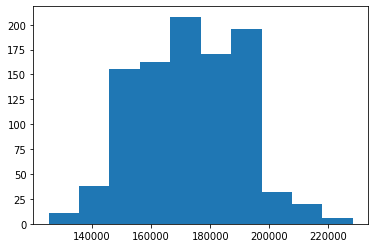

In [33]:
values_dev = df_all_cases[(df_all_cases['Total Damage']>0)& (df_all_cases['Total Damage']!= np.nan)]['Total Damage']
from sklearn.utils import resample
# configure bootstrap
n_iterations = 1000
n_size = int(len(values_dev) * 0.50)
# run bootstrap
stats = list()
for i in range(n_iterations):
    sub_sample = resample(values_dev, n_samples=n_size)
    median = np.median(sub_sample)
#     print(median)
    stats.append(median)
# plot scores
p2 = plt.hist(stats)
# confidence intervals
alpha = 0.90
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(stats, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = np.percentile(stats, p)
print('%.1f confidence interval $%.1f and $%.1f' % (alpha*100, lower, upper))

80.0 confidence interval $108396.6 and $193783.5


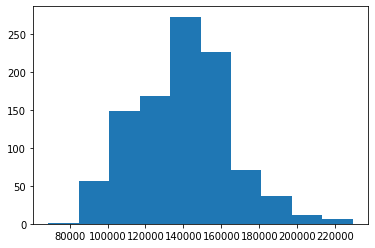

In [34]:
values = gold[(gold['$ Damages total before contributory negligence']>0)& (gold['$ Damages total before contributory negligence']!= np.nan)]['$ Damages total before contributory negligence']
# configure bootstrap
n_iterations = 1000
n_size = int(len(values) * 0.50)
# run bootstrap
stats_gold = list()
for i in range(n_iterations):
    sub_sample = resample(values, n_samples=n_size)
    median = np.median(sub_sample)
#     print(median)
    stats_gold.append(median)
# plot scores
plt.hist(stats_gold)
# confidence intervals
alpha = 0.80
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(stats_gold, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = np.percentile(stats, p)
print('%.1f confidence interval $%.1f and $%.1f' % (alpha*100, lower, upper))

Text(0.5, 1.0, 'Median Total Damages Bootstrapped, High-Precision Classifier and Gold, 10000 reps')

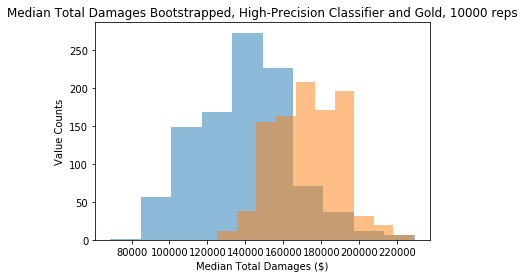

In [36]:
plt.hist(stats_gold, alpha = 0.5)
plt.hist(stats, alpha = 0.5)
plt.xlabel('Median Total Damages ($)')
plt.ylabel('Value Counts')
plt.title("Median Total Damages Bootstrapped, High-Precision Classifier and Gold, 10000 reps")

#### Compare Bootstrapped Medians for Total Damages, Predicted vs Gold, Same Cases

In [15]:
annotated_case_names = set(gold[(gold['$ Damages total before contributory negligence']>0)& (gold['$ Damages total before contributory negligence']!= np.nan)]['Case Name'])


95.0 confidence interval for our gold data is: $88750.0 and $210588.5, and for dev: $77500.0 and $241073.6


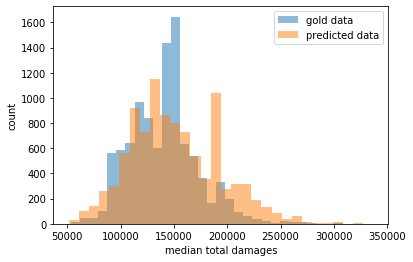

In [39]:
from sklearn.utils import resample

# configure bootstrap
n_iterations = 10000
n_size = int(len(annotated_case_names) * 0.25)
# run bootstrap
stats_gold = []
stats_dev = []
for i in range(n_iterations):
    sub_sample = resample(list(annotated_case_names), n_samples=n_size)
    median_gold = np.median(gold[gold['Case Name'].isin(sub_sample)]['$ Damages total before contributory negligence'])
    median_dev = np.median(df_all_cases[df_all_cases['Case Name'].isin(sub_sample)&(df_all_cases['Total Damage']>0)& (df_all_cases['Total Damage']!= np.nan)]['Total Damage'])
    stats_gold.append(median_gold)
    stats_dev.append(median_dev)
# plot scores
plt.hist(stats_gold, alpha = 0.5,  label = 'gold data', bins=30)
plt.hist(stats_dev, alpha = 0.5, label = 'predicted data', bins = 30)
plt.xlabel('median total damages')
plt.ylabel('count')
plt.legend()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower_gold =  np.percentile(stats_gold, p)
lower_dev = np.percentile(stats_dev, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper_gold = np.percentile(stats_gold, p)
upper_dev = np.percentile(stats_dev, p)
print('%.1f confidence interval for our gold data is: $%.1f and $%.1f, and for dev: $%.1f and $%.1f' % (alpha*100, lower_gold, upper_gold, lower_dev, upper_dev))

6679.460000000006
95.0 confidence interval for our gold data is: $99930.0 and $181047.7, and for dev: $99863.0 and $206701.1


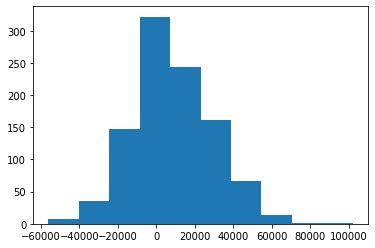

In [35]:
from sklearn.utils import resample

# configure bootstrap
n_iterations = 1000
n_size = int(len(annotated_case_names) * 0.50)
# run bootstrap
stats_gold = []
stats_dev = []
differences = []
for i in range(n_iterations):
    sub_sample = resample(list(annotated_case_names), n_samples=n_size)
    median_gold = np.median(gold[gold['Case Name'].isin(sub_sample)]['$ Damages total before contributory negligence'])
    median_dev = np.median(df_all_cases[df_all_cases['Case Name'].isin(sub_sample)&(df_all_cases['Total Damage']>0)& (df_all_cases['Total Damage']!= np.nan)]['Total Damage'])
    difference = median_dev - median_gold
    differences.append(difference)
    stats_gold.append(median_gold)
    stats_dev.append(median_dev)
# plot scores
# plt.hist(stats_gold, alpha = 0.5,  label = 'gold data')
# plt.hist(stats_dev, alpha = 0.5, label = 'predicted data')
# plt.xlabel('median total damages')
# plt.ylabel('count')
# plt.legend()
x = plt.hist(differences)
print(np.median(differences))
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower_gold =  np.percentile(stats_gold, p)
lower_dev = np.percentile(stats_dev, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper_gold = np.percentile(stats_gold, p)
upper_dev = np.percentile(stats_dev, p)
print('%.1f confidence interval for our gold data is: $%.1f and $%.1f, and for dev: $%.1f and $%.1f' % (alpha*100, lower_gold, upper_gold, lower_dev, upper_dev))

### Filled/Empty Accuracies

In [12]:
key_functions.evaluate(df_all_cases, gold) 

#### Evaluation ####


KeyError: [None]

In [12]:
key_functions.evaluate(df_all_cases, gold) 

#### Evaluation ####


/home/ilana/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


-------
COLUMN: Case Number
Filled field accuracy: 10.357142857142858 % 29 / 280
Overall accuracy: 10.357142857142858 % 29 / 280
-------
COLUMN: Case Name
Filled field accuracy: 100.0 % 280 / 280
Overall accuracy: 100.0 % 280 / 280
-------
COLUMN: $ Damages total before contributory negligence
Average distance from correct answer: $98340.00494029852
Empty field accuracy: 96.51162790697676 % 83 / 86
Filled field accuracy: 35.56701030927835 % 69 / 194
Overall accuracy: 54.285714285714285 % 152 / 280
-------
COLUMN: $ Pecuniary Damages Total
Average distance from correct answer: $192120.12209876542
Empty field accuracy: 81.08108108108108 % 30 / 37
Filled field accuracy: 15.22633744855967 % 37 / 243
Overall accuracy: 23.92857142857143 % 67 / 280
-------
COLUMN: $ Non-Pecuniary Damages
Average distance from correct answer: $76250.0
Empty field accuracy: 96.53179190751445 % 167 / 173
Filled field accuracy: 83.17757009345794 % 89 / 107
Overall accuracy: 91.42857142857143 % 256 / 280
-------
C

In [13]:
# percent reduction results without filtering for 'contributory negligence successful'
annotated_cn_df = pd.DataFrame.from_dict(dict(annotated_cn), orient='index', columns = ['Percent Reduction']).reset_index().rename(columns = {'index': 'Case Name'})
key_functions.evaluate(annotated_cn_df, gold)

#### Evaluation ####
-------
COLUMN: Case Name
Filled field accuracy: 100.0 % 109 / 109
Overall accuracy: 100.0 % 109 / 109
-------
COLUMN: % Reduction as a result of contributory negligence
Average distance from correct answer: $0.35555555555555557
Empty field accuracy: 86.56716417910447 % 58 / 67
Filled field accuracy: 73.80952380952381 % 31 / 42
Overall accuracy: 81.65137614678899 % 89 / 109


Statistical Significance - Median Total Damage per year

In [25]:
def get_relationship_over_time(damage_type, df):
    filtered_dev = df[(df['Year']!= math.nan) & (df[damage_type] > 0)]
    filtered_dev[damage_type] = pd.to_numeric(filtered_dev[damage_type])
    grouped = filtered_dev.groupby('Year').median().reset_index()
    x = pd.to_numeric(grouped.Year)
    y = pd.to_numeric(grouped[damage_type])
    corr, pval = pearsonr(x, y)
    print('correlation between Year and Median %s is: %s with a pvalue of %s'%(damage_type, corr, pval))
    return linregress(x, y), 

In [33]:
get_relationship_over_time('Total Damage', df_all_cases)

correlation between Year and Total Damage is: 0.9206094886469115 with a pvalue of 3.38530050311366e-09


/home/ilana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(LinregressResult(slope=9909.74307792208, intercept=-19780188.67614719, rvalue=0.9206094886469116, pvalue=3.3853005031136117e-09, stderr=964.3040314508022),)

In [34]:
get_relationship_over_time('Non Pecuniary', df_all_cases)

correlation between Year and Non Pecuniary is: 0.7626543589270809 with a pvalue of 5.825928177119583e-05


/home/ilana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(LinregressResult(slope=2711.0389610389607, intercept=-5378962.121212121, rvalue=0.7626543589270808, pvalue=5.825928177119612e-05, stderr=527.4792881790837),)

In [35]:
get_relationship_over_time('Total Pecuniary', df_all_cases)

correlation between Year and Total Pecuniary is: 0.7940657446537204 with a pvalue of 1.7276100047883053e-05


/home/ilana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(LinregressResult(slope=7701.254311688311, intercept=-15386529.342683982, rvalue=0.7940657446537203, pvalue=1.7276100047883147e-05, stderr=1352.420287652023),)

In [36]:
get_relationship_over_time('Future Care', df_all_cases)

correlation between Year and Future Care is: 0.37116748033063585 with a pvalue of 0.0976123529122324


/home/ilana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(LinregressResult(slope=543.8124935064935, intercept=-1074652.3505194804, rvalue=0.3711674803306359, pvalue=0.09761235291223239, stderr=312.1154091940267),)

In [37]:
get_relationship_over_time('Special', df_all_cases)

correlation between Year and Special is: 0.6356760989016429 with a pvalue of 0.0019550876762802678


/home/ilana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(LinregressResult(slope=1090.016538961039, intercept=-2170175.217359307, rvalue=0.635676098901643, pvalue=0.00195508767628026, stderr=303.67769215650355),)

In [54]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
filtered_dev = df_all_cases[(df_all_cases['Year']!= math.nan) & (df_all_cases['Total Damage'] > 0)]
grouped = filtered_dev.groupby('Year').median().reset_index()
year = pd.to_numeric(grouped['Year']).to_numpy().reshape(-1, 1)
damage = pd.to_numeric(grouped['Total Damage']).to_numpy().reshape(-1, 1)

# print ("Statsmodel.Formula.Api Method")
# model1 = smf.ols(formula='Total Damage~Year', data=df_all_cases).fit()
# print (model1.params)
# print(model1.summary())

print( "\nStatsmodel.Api Method")
model2 = sm.OLS(damage, year)
results = model2.fit()
print( results.summary())

print ("\nSci-Kit Learn Method")
model3 = LinearRegression()
model3.fit(damage, year)
print( model3.coef_)
print (model3.intercept_)
print(model3.score(year, damage))


Statsmodel.Api Method
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.821
Model:                            OLS   Adj. R-squared (uncentered):              0.812
Method:                 Least Squares   F-statistic:                              91.47
Date:                Tue, 09 Jun 2020   Prob (F-statistic):                    6.66e-09
Time:                        15:15:44   Log-Likelihood:                         -262.46
No. Observations:                  21   AIC:                                      526.9
Df Residuals:                      20   BIC:                                      528.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

### Visualizations

In [18]:
def inflation_adjust(dataframe, r1, r2):
    '''Function takes in a dataframe and multiply selected rows by inflation rate
    df --- DataFrame
    r1 --- Index of the start row in the range
    r2 --- Index of the end row in the range'''
    dataframe['Year'] = dataframe['Year'].astype(str)
    dataframe = dataframe[dataframe.Year != '2020']  
    df = dataframe.dropna(how='all')
    # check to see if the indices are intigers and are within data fram range
    assert isinstance(r1, int) and isinstance(r2, int) and r1 >= 0 and r2 <= len(df.columns)
    # Check to see if the columns selected are not float or int type
#     for col in df.iloc[:,r1:r2]:
#         if df[col].dtype != "float64" or df[col].dtype != "int64":
#             print("column {} is not numerical type".format(df[col]))
    inflection_dict = {"2000":1.4392,"2001":1.3906, "2002":1.3668,
                       "2003":1.3281, "2004":1.3064, "2005":1.2758, 
                       "2006":1.2454, "2007":1.2186, "2008":1.1982, 
                       "2009":1.1940, "2010":1.1724, "2011":1.1352, 
                       "2012":1.1129, "2013":1.1084,"2014":1.0863, 
                       "2015":1.0777, "2016":1.06, "2017":1.0429, 
                       "2018":1.0203, "2019":1.0}
    df["scaler"] = df['Year'].map(inflection_dict)
    df.iloc[:,r1:r2] = df.iloc[:,r1:r2].mul(df["scaler"], axis = 0)
    return df


In [ ]:
inflation_df = inflation_adjust(df_all_cases, 3, 11)

/home/ilana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x7f9289f69fd0> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


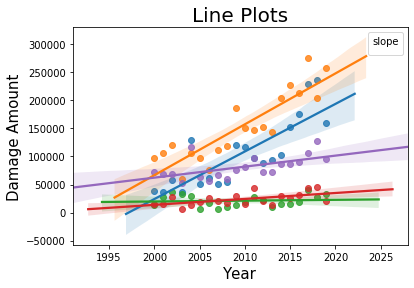

In [68]:
import seaborn as sns
df_grouped = inflation_df.groupby('Year').median()
df_grouped_int = df_grouped.reset_index()
df_grouped_int["Year"] = df_grouped_int["Year"].astype(int)
p1 = sns.regplot(x='Year', y='Total Pecuniary', data=df_grouped_int)
p2 = sns.regplot(x='Year', y='Total Damage', data=df_grouped_int)
p3 = sns.regplot(x='Year', y='Future Care', data=df_grouped_int)
p4 = sns.regplot(x='Year', y='Special', data=df_grouped_int)
p5 = sns.regplot(x='Year', y='Non Pecuniary', data=df_grouped_int)

plt.title("Line Plots", fontsize = 20)
plt.legend([p1, p2, p3, p4, p5], #(['Total Pecuniary', 'Total Damage', 'Future Care', 'Special', 'Non Pecuniary']
           ['slope=7701.254311688311', 'slope=9909.74307792208', 'slope=543.8124935064935', 'slope=1090.016538961039', 'slope=2711.0389610389607'], title='slope')
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Damage Amount", fontsize = 15)
plt.show()

## Rule-Based Evaluation

In [2]:
path = "../../data/Lexis Cases txt/"
list_of_files = os.listdir(path)

# list of dictionaries of attributes per document
all_cases_parsed =[]
for file in list_of_files:
    if file != ".DS_Store" and file != ".ipynb_checkpoints":
        print(file)
        all_cases_parsed.extend(key_functions.rule_based_parse_BCJ(path + file))

P1.txt
P21.txt
P64.txt
P14.txt
P41.txt
P11.txt
P60.txt
P48.txt
P83.txt
P23.txt
P73.txt
P26.txt
P75.txt
P65.txt
P32.txt
P34.txt
P16.txt
P37.txt
P7.txt
P51.txt
P30.txt
P25.txt
P62.txt
P19.txt
P53.txt
P49.txt
P39.txt
P45.txt
P72.txt
P55.txt
P81.txt
P22.txt
P28.txt
ERROR: cant convert string, 0%
P58.txt
P46.txt
P3.txt
P5.txt
P8.txt
P56.txt
P43.txt
P36.txt
P2.txt
P13.txt
P67.txt
P38.txt
P79.txt
P57.txt
P80.txt
P84.txt
P54.txt
P50.txt
P77.txt
P20.txt
P24.txt
P85.txt
P10.txt
P6.txt
P35.txt
P74.txt
P27.txt
P78.txt
P61.txt
P71.txt
P9.txt
P70.txt
P44.txt
P15.txt
P82.txt
P69.txt
P29.txt
P18.txt
P4.txt
P40.txt
P66.txt
P12.txt
P59.txt
P63.txt
P68.txt
P33.txt
P47.txt
P76.txt
P52.txt
P31.txt
P17.txt
P42.txt


In [3]:
all_cases_parsed[1]

{'case_number': '3 of 1',
 'case_title': 'Furness v. Guest, [2010] B.C.J. No. 1388',
 'year': '2010',
 'registry': 'Nanaimo',
 'judge': 'D.A. Halfyard J.',
 'decision_length': '97',
 'multiple_defendants': 'Y',
 'contributory_negligence_raised': True,
 'written_decision': True,
 'plaintiff_wins': 'Y',
 'damages': defaultdict(float,
             {'Special': 42041.399999999994,
              'General': None,
              'Punitive': None,
              'Aggravated': None,
              'Future Care': None,
              'Pecuniary Total': 42041.399999999994,
              'Non Pecuniary': None,
              'Total': 42041.399999999994}),
 'percent_reduction': 0.75,
 'contributory_negligence_successful': True}

In [4]:
df_rule_based= key_functions.rule_based_convert_cases_to_DF(all_cases_parsed)
df_rule_based['Contributory Negligence Successful'].replace(np.nan, False, inplace = True)
df_rule_based[:10]

,Case Number,Case Name,Year,Total Damage,Total Pecuniary,Non Pecuniary,General,Special,Punitive,Aggravated,Future Care,Judge Name,Decision Length,Multiple defendants?,Plaintiff Wins?,Contributory Negligence Raised,Written Decision?,Registry,Contributory Negligence Successful,Percent Reduction
0,2 of 1,"Ediger (Guardian ad litem of) v. Johnston, [20...",2009,20000.00,NaN,NaN,20000.0,NaN,NaN,NaN,NaN,H.J. Holmes J.,350,N,Y,False,True,Vancouver,False,NaN
1,3 of 1,"Furness v. Guest, [2010] B.C.J. No. 1388",2010,42041.40,42041.40,NaN,NaN,42041.40,NaN,NaN,NaN,D.A. Halfyard J.,97,Y,Y,True,True,Nanaimo,True,0.75
2,4 of 1,"Howell v. Machi, [2017] B.C.J. No. 2016",2017,2178781.77,2178781.77,NaN,2050000.0,28781.77,100000.0,NaN,NaN,H. MacNaughton,525,Y,Y,True,True,Vancouver,True,0.25
3,5 of 1,"Morrow v. Outerbridge, [2009] B.C.J. No. 640",2009,800000.00,800000.00,NaN,NaN,NaN,800000.0,NaN,NaN,E.A. Bennett J.,311,Y,Y,False,True,Vancouver,False,NaN
4,6 of 1,"Parlby v. Starr, [2017] B.C.J. No. 2621",2017,2678470.58,2388470.58,290000.0,1265141.0,115302.24,NaN,NaN,1008027.34,M.L. Fleming J.,593,Y,Y,True,True,Vancouver,True,0.35
5,7 of 1,"Minhas v. Sartor, [2012] B.C.J. No. 1087",2012,95816.00,25816.00,70000.0,NaN,24466.00,NaN,NaN,1350.00,W.G. Baker J.,462,N,Y,True,True,New Westminster,True,0.20
6,9 of 1,"Watkins v. Dormuth, [2014] B.C.J. No. 557",2014,965827.10,790827.10,175000.0,525000.0,255077.10,NaN,NaN,10750.00,M.B. Blok J.,305,Y,Y,False,True,Campbell River,False,NaN
7,10 of 1,"Paur (Committee of) v. Providence Health Care,...",2015,362934.28,7634.28,355300.0,NaN,5594.28,NaN,NaN,2040.00,S.A. Griffin J.,755,Y,Y,True,True,Vancouver,False,NaN
8,12 of 1,"Huang v. Canadian National Railway Co., [2018]...",2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M.L. Fleming J.,604,Y,Y,True,True,Vancouver,True,0.40
9,13 of 1,"Culos v. Chretien, [2012] B.C.J. No. 1475",2012,395232.25,320232.25,75000.0,300000.0,8732.25,NaN,NaN,11500.00,P. Rogers J.,75,N,Y,True,True,Kelowna,False,NaN


In [5]:
df_rule_based['Contributory Negligence Successful'].replace(True, 'Y', inplace=True)
df_rule_based['Contributory Negligence Successful'].replace(False, 'N', inplace= True)
df_rule_based['Percent Reduction'].replace(0, np.nan, inplace = True)
df_rule_based['Percent Reduction'].replace(1, np.nan, inplace = True)

In [8]:
key_functions.evaluate(df_rule_based[['Case Name','Percent Reduction']], gold, focus_column='Percent Reduction')

#### Evaluation ####
-------
COLUMN: Case Name
Filled field accuracy: 100.0 % 30 / 30
Overall accuracy: 100.0 % 30 / 30
-------
COLUMN: % Reduction as a result of contributory negligence
Average distance from correct answer: $0.24444444444444446
Empty field accuracy: 0.0 % 0 / 9
Filled field accuracy: 100.0 % 21 / 21
Overall accuracy: 70.0 % 21 / 30


/home/ilana/Documents/MDS_Capstone/Capstone-project/code/experimental-notebooks/key_functions.py:1262: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_data.dropna(subset = [focus_column], inplace=True)
/home/ilana/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


### Visualization

In [19]:
inflation_df = inflation_adjust(df_rule_based, 3, 11)

/home/ilana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x7fbcb0c14128> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  if sys.path[0] == '':


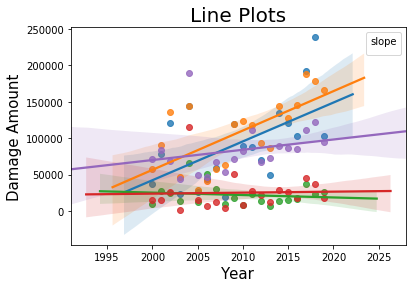

In [20]:
df_grouped = inflation_df.groupby('Year').median()
df_grouped_int = df_grouped.reset_index()
df_grouped_int["Year"] = df_grouped_int["Year"].astype(int)
p1 = sns.regplot(x='Year', y='Total Pecuniary', data=df_grouped_int)
p2 = sns.regplot(x='Year', y='Total Damage', data=df_grouped_int)
p3 = sns.regplot(x='Year', y='Future Care', data=df_grouped_int)
p4 = sns.regplot(x='Year', y='Special', data=df_grouped_int)
p5 = sns.regplot(x='Year', y='Non Pecuniary', data=df_grouped_int)

plt.title("Line Plots", fontsize = 20)
plt.legend([p1, p2, p3, p4, p5], #(['Total Pecuniary', 'Total Damage', 'Future Care', 'Special', 'Non Pecuniary']
           ['slope=7701.254311688311', 'slope=9909.74307792208', 'slope=543.8124935064935', 'slope=1090.016538961039', 'slope=2711.0389610389607'], title='slope')
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Damage Amount", fontsize = 15)
plt.show()

In [30]:
df_rule_based[df_rule_based['Total Damage'] > 0].groupby('Year').count()

,Case Number,Case Name,Total Damage,Total Pecuniary,Non Pecuniary,General,Special,Punitive,Aggravated,Future Care,Judge Name,Decision Length,Multiple defendants?,Plaintiff Wins?,Contributory Negligence Raised,Written Decision?,Registry,Contributory Negligence Successful,Percent Reduction
Year,,,,,,,,,,,,,,,,,,,
2000,33,33,33,26,17,21,21,0,1,8,33,33,33,33,33,33,33,33,6
2001,37,37,37,27,15,24,19,3,5,7,37,37,37,37,37,37,37,37,8
2002,27,27,27,20,7,24,12,2,0,10,27,27,27,27,27,27,27,27,6
2003,30,30,30,20,12,14,16,1,1,4,30,30,30,30,30,30,30,30,4
2004,17,17,17,13,6,9,8,2,1,5,17,17,17,17,17,17,17,17,5
2005,29,29,29,21,12,20,13,1,0,4,29,29,29,29,29,29,29,29,5
2006,40,40,40,31,18,22,22,5,3,10,40,40,40,40,40,40,40,40,8
2007,41,41,41,36,15,25,24,5,5,9,41,41,41,41,41,41,41,41,11
2008,39,39,39,35,23,16,26,2,0,18,39,39,39,39,39,39,39,39,7


In [26]:
for col in df_rule_based.columns[3:11]:
    print(get_relationship_over_time(col, df_rule_based), '\n')
    print('=====')

correlation between Year and Median Total Damage is: 0.8119689829606106 with a pvalue of 7.848272065943638e-06
(LinregressResult(slope=7579.604474025973, intercept=-15133353.208982682, rvalue=0.8119689829606105, pvalue=7.848272065943682e-06, stderr=1250.029984433798),) 

=====
correlation between Year and Median Total Pecuniary is: 0.7090751784287639 with a pvalue of 0.000319655322797451
(LinregressResult(slope=6928.283123376622, intercept=-13838471.620367963, rvalue=0.7090751784287638, pvalue=0.000319655322797452, stderr=1580.6201535653026),) 

=====
correlation between Year and Median Non Pecuniary is: 0.5238031227793404 with a pvalue of 0.014803902487671836
(LinregressResult(slope=2457.7922077922076, intercept=-4867757.575757575, rvalue=0.5238031227793404, pvalue=0.01480390248767185, stderr=916.9760240849272),) 

=====
correlation between Year and Median General is: 0.7070517943528324 with a pvalue of 0.00033840330809077704
(LinregressResult(slope=3150.1237077922083, intercept=-6260

/home/ilana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
